In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector 
import numpy as np

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
db=mysql.connector.connect(host="localhost",username='root',password=os.getenv('PASSWORD'),database='ecommerce')

In [3]:
cur=db.cursor()

# List all unique cities where customers are located.

In [4]:
query=""" select distinct customer_city from customers """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Cities'])
df

,Cities
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


# Count the number of orders placed in 2017.

In [5]:
query=""" SELECT count(*) FROM orders where year(order_purchase_timestamp)=2017 """
cur.execute(query)
data=cur.fetchall()
data[0][0]

45101

# Find the total sales per category.

In [6]:
query=""" select ecommerce.products.product_category,sum(ecommerce.payments.payment_value) sales from ecommerce.order_items join 
ecommerce.products on ecommerce.products.product_id=ecommerce.order_items.product_id
join ecommerce.payments on ecommerce.payments.order_id=ecommerce.order_items.order_id group by ecommerce.products.product_category 
order by sales desc;   """
cur.execute(query)
data=cur.fetchall()
data

[('bed table bath', 1712553.671003269),
 ('HEALTH BEAUTY', 1657373.1193935554),
 ('computer accessories', 1585330.4462582897),
 ('Furniture Decoration', 1430176.3917766158),
 ('Watches present', 1429216.6785924584),
 ('sport leisure', 1392127.5591495223),
 ('housewares', 1094758.1302838866),
 ('automotive', 852294.3311252594),
 ('Garden tools', 838280.7507782131),
 ('Cool Stuff', 779698.0000486821),
 ('Furniture office', 646826.4871485233),
 ('toys', 619037.6894793902),
 ('babies', 539845.659735024),
 ('perfumery', 506738.6598940939),
 ('telephony', 486882.05071262456),
 ('stationary store', 317440.06965875626),
 ('pet Shop', 311268.9703014195),
 ('PCs', 279121.5493659973),
 ('electronics', 259857.09967413358),
 (None, 252801.71008366346),
 ('Construction Tools Construction', 241475.6302587986),
 ('musical instruments', 233074.12068796158),
 ('electrostile', 225584.38002350926),
 ('Fashion Bags and Accessories', 218158.28002214432),
 ('fixed telephony', 207010.25965237617),
 ('Games co

# Calculate the percentage of orders that were paid in installments.

In [7]:
query=""" SELECT (
	select count(*) from ecommerce.payments where payment_installments>=1
)/(select count(*) from ecommerce.payments) *100 FROM ecommerce.payments limit 1; """
cur.execute(query)
data=cur.fetchall()
data[0][0]

Decimal('99.9981')

# Count the number of customers from each state. 

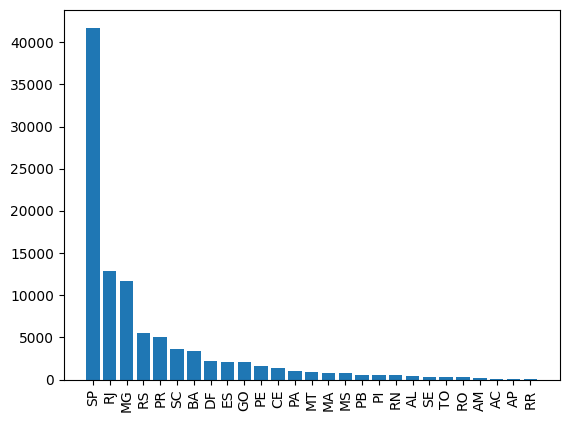

In [8]:
query=""" SELECT customer_state,count(customer_id) FROM ecommerce.customers group by customer_state; """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['state','customer_count'])
df=df.sort_values(by='customer_count',ascending=False)
plt.xticks(rotation=90)
plt.bar(df['state'],df['customer_count'])
plt.show()

# Calculate the number of orders per month in 2018.

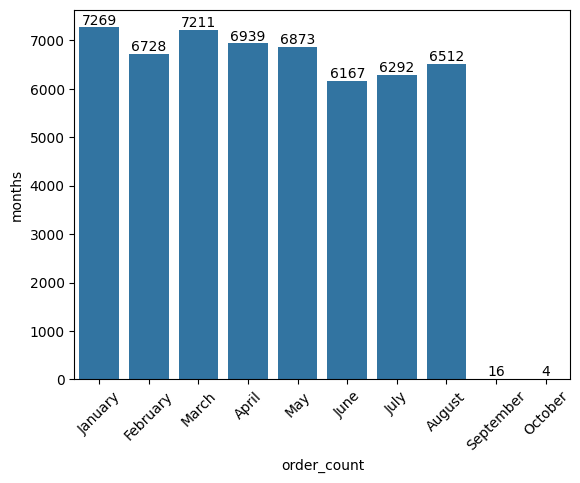

In [9]:
query=""" SELECT count(*) no_of_orders,monthname(order_purchase_timestamp) Month FROM ecommerce.orders 
where year(order_purchase_timestamp)=2018
group by monthname(order_purchase_timestamp) ; """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['months','order_count'])
o=['January','February','March','April','May','June','July','August','September','October']
ax=sns.barplot(y=df['months'],x=df['order_count'],order=o)
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

# Find the average number of products per order, grouped by customer city.

In [10]:
query=""" with temp as (SELECT count(ecommerce.order_items.order_id) as particular_order,
ecommerce.customers.customer_city,ecommerce.order_items.order_id FROM ecommerce.order_items 
join ecommerce.orders 
on ecommerce.order_items.order_id=ecommerce.orders.order_id
join ecommerce.customers on ecommerce.customers.customer_id=ecommerce.orders.customer_id 
where ecommerce.order_items.order_id=ecommerce.orders.order_id 
group by ecommerce.customers.customer_city,ecommerce.order_items.order_id)
select temp.customer_city,avg(particular_order) as avg_of_products from temp group by temp.customer_city order by avg_of_products desc
; """
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['City','Average of orders'])
df

,City,Average of orders
0,padre carvalho,7.0000
1,celso ramos,6.5000
2,datas,6.0000
3,candido godoi,6.0000
4,matias olimpio,5.0000
...,...,...
4105,garruchos,1.0000
4106,humberto de campos,1.0000
4107,bela vista do maranhao,1.0000
4108,cantanhede,1.0000


# Calculate the percentage of total revenue contributed by each product category.

In [11]:
query=""" select ecommerce.products.product_category,
sum(ecommerce.payments.payment_value)/(select sum(ecommerce.payments.payment_value) from ecommerce.payments)*100 sales_percentage 
from ecommerce.order_items join 
ecommerce.products on ecommerce.products.product_id=ecommerce.order_items.product_id
join ecommerce.payments on ecommerce.payments.order_id=ecommerce.order_items.order_id group by ecommerce.products.product_category 
order by sales_percentage desc;"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Product Category','Percentage Revenue'])
df

,Product Category,Percentage Revenue
0,bed table bath,10.697529
1,HEALTH BEAUTY,10.352841
2,computer accessories,9.902824
3,Furniture Decoration,8.933649
4,Watches present,8.927654
...,...,...
69,PC Gamer,0.013583
70,House Comfort 2,0.010685
71,cds music dvds,0.007492
72,Fashion Children's Clothing,0.004908


# Identify the correlation between product price and the number of times a product has been purchased.

In [12]:
query=""" SELECT ecommerce.products.product_category,avg(price),count(order_id) total_orders FROM ecommerce.order_items
join ecommerce.products on products.product_id=order_items.product_id
group by ecommerce.products.product_category order by total_orders desc ;"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['Product Category','Product Price','Number of times product bought'])
arr1=df['Number of times product bought']
arr2=df['Product Price']
np.corrcoef(arr1,arr2)

array([[ 1.        , -0.10631552],
       [-0.10631552,  1.        ]])

# Calculate the total revenue generated by each seller, and rank them by revenue.

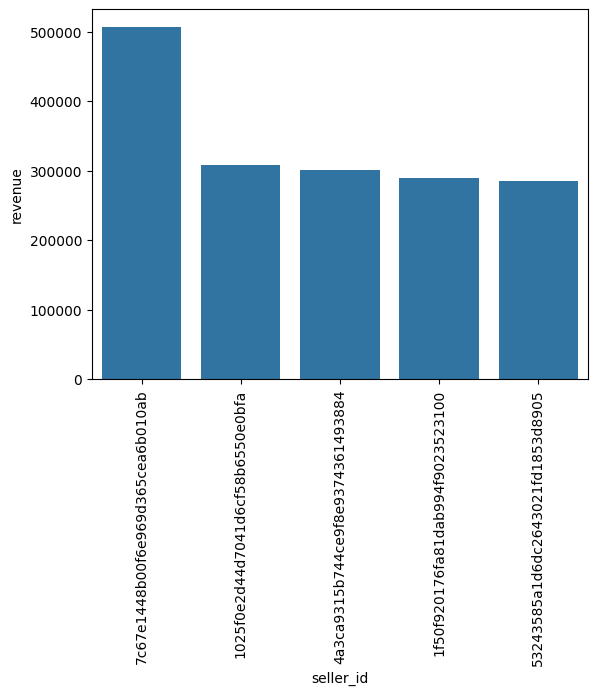

In [13]:
query="""select *,dense_rank() over(order by revenue desc) as rn from 
(SELECT seller_id,sum(ecommerce.payments.payment_value) revenue FROM ecommerce.order_items 
join ecommerce.payments on ecommerce.payments.order_id=ecommerce.order_items.order_id 
group by seller_id order by revenue desc) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['seller_id','revenue','rank'])
df=df.head(5)
sns.barplot(x='seller_id',y='revenue',data=df)
plt.xticks(rotation=90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [14]:
query="""select customer_id,order_purchase_timestamp,payment,avg(payment) over(partition by customer_id order by order_purchase_timestamp 
rows between 2 preceding and current row) as mov_avg from 
 (select orders.customer_id, orders.order_purchase_timestamp,payments.payment_value as payment
 from payments join orders on payments.order_id=orders.order_id) as a"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['customer_id','time','payment','mov_avg'])
df

,customer_id,time,payment,mov_avg
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410004
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.419998
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350006
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010002
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,71.23,27.120001
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130001
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130005
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


# Calculate the cumulative sales per month for each year.

In [15]:
query="""
select m,y,sum(payment) over (order by y,m) from 
(select month(orders.order_purchase_timestamp) m,year(orders.order_purchase_timestamp) y,
sum(payments.payment_value) payment from ecommerce.orders join ecommerce.payments 
on ecommerce.payments.order_id=ecommerce.orders.order_id 
group by month(orders.order_purchase_timestamp),year(orders.order_purchase_timestamp)
order by year(orders.order_purchase_timestamp),month(orders.order_purchase_timestamp)) as a;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

,0,1,2
0,9,2016,2.522400e+02
1,10,2016,5.934272e+04
2,12,2016,5.936234e+04
3,1,2017,1.978504e+05
4,2,2017,4.897584e+05
5,3,2017,9.396220e+05
6,4,2017,1.357410e+06
7,5,2017,1.950329e+06
8,6,2017,2.461605e+06
9,7,2017,3.053988e+06


# Calculate the year-over-year growth rate of total sales.

In [16]:
query="""with a as (select year(ecommerce.orders.order_purchase_timestamp) years,sum(payments.payment_value) sales
from ecommerce.payments join ecommerce.orders
on ecommerce.payments.order_id=ecommerce.orders.order_id
group by year(ecommerce.orders.order_purchase_timestamp)
order by years)

select years,((sales-lag(sales,1) over (order by years))/lag(sales,1) over (order by years))*100 sales_growth_percentage from a
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['year','sales_growth_percentage'])
df

,year,sales_growth_percentage
0,2016,NaN
1,2017,12112.703760
2,2018,20.000924


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [17]:
query="""with temp as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_purchase
from ecommerce.customers join ecommerce.orders
on ecommerce.customers.customer_id= ecommerce.orders.customer_id
group by ecommerce.customers.customer_id)
select temp.customer_id,count(distinct orders.order_purchase_timestamp) from temp join ecommerce.orders
on temp.customer_id=orders.customer_id and ecommerce.orders.order_purchase_timestamp>temp.first_purchase 
and ecommerce.orders.order_purchase_timestamp<date_add(temp.first_purchase ,interval 6 month)
group by temp.customer_id;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data)
df

""


# Identify the top 3 customers who spent the most money in each year.

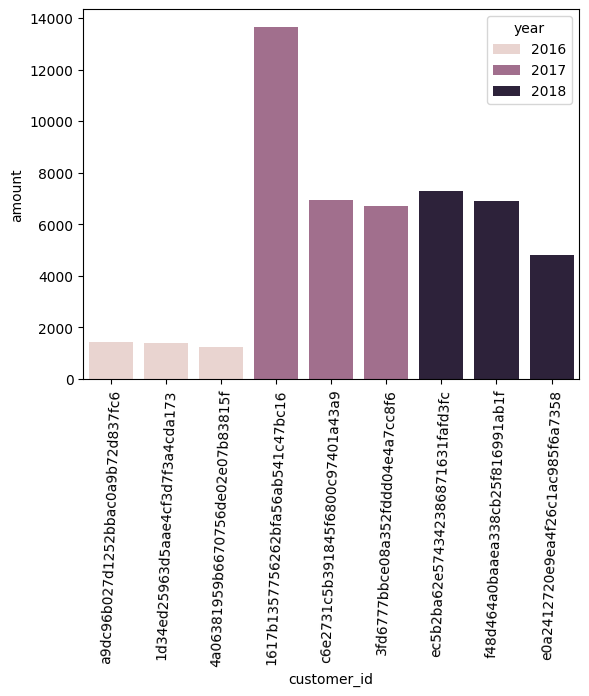

In [30]:
query="""select years,customer_id,payment,d_rank from 
(select year(orders.order_purchase_timestamp) years,orders.customer_id,sum(payments.payment_value) payment,
dense_rank() over (partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) d_rank
from orders join payments on payments.order_id=orders.order_id
group by year(orders.order_purchase_timestamp),orders.customer_id
) as a
where d_rank<=3
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=['year','customer_id','amount','rank'])
sns.barplot(x='customer_id',y='amount',data=df,hue='year')
plt.xticks(rotation=88)
plt.show()